In [ ]:
#pip install numpy==1.24.4 matplotlib==3.7.4

  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached matplotlib-3.7.4-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl (14.8 MB)
Using cached matplotlib-3.7.4-cp311-cp311-win_amd64.whl (7.5 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.0

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-2.3.0:
   ---------------------------------------- 0/2 [numpy]
      Successfully uninstalled numpy-2.3.0
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   -----------

  You can safely remove it manually.
  You can safely remove it manually.


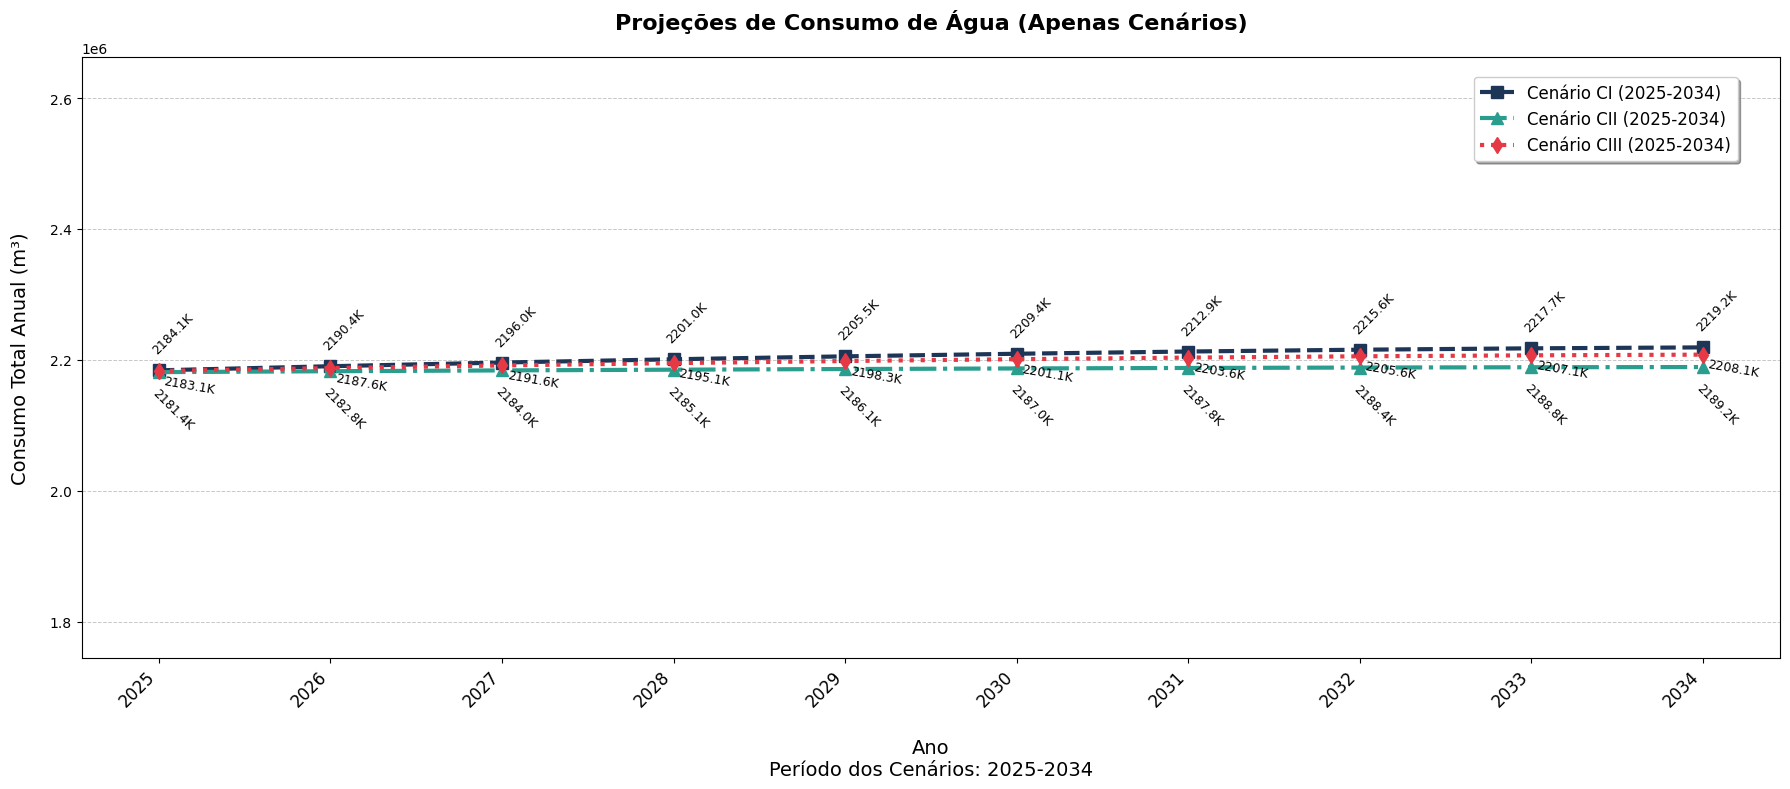

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

path = 'C:\\Users\\Edmilson\\Gama_Workspace2\\ABMS-WP'

# 1. Carregar apenas dados de cenários futuros
scenario_file = os.path.join(path, 'resultados\\dados_simulacao3.csv')
df_scenarios = pd.read_csv(scenario_file)
df_scenarios.columns = ['Month/Year', 'Scenario CI', 'Scenario CII', 'Scenario CIII']
df_scenarios['Date'] = pd.to_datetime(df_scenarios['Month/Year'], format='%m/%Y')

# 2. Filtrar dados até 2034
df_scenarios = df_scenarios[df_scenarios['Date'] < pd.to_datetime('2035-01-01')]

# 3. Função para somar dados anualmente
def sum_yearly(df, value_column):
    df_year = df.copy()
    df_year['Year'] = df_year['Date'].dt.year
    return df_year.groupby('Year')[value_column].sum().reset_index()

# 4. Somar dados anualmente (apenas cenários)
df_ci_sum = sum_yearly(df_scenarios[['Date', 'Scenario CI']].rename(columns={'Scenario CI': 'Value'}), 'Value')
df_cii_sum = sum_yearly(df_scenarios[['Date', 'Scenario CII']].rename(columns={'Scenario CII': 'Value'}), 'Value')
df_ciii_sum = sum_yearly(df_scenarios[['Date', 'Scenario CIII']].rename(columns={'Scenario CIII': 'Value'}), 'Value')

# 5. Combinar dados dos cenários
df_combined = pd.DataFrame({
    'Year': df_ci_sum['Year'],  # Usando anos dos cenários apenas
    'Scenario CI': df_ci_sum['Value'],
    'Scenario CII': df_cii_sum['Value'],
    'Scenario CIII': df_ciii_sum['Value']
}).sort_values('Year')

# 6. Determinar período dos cenários
scenario_period = f"{df_scenarios['Date'].dt.year.min()}-{df_scenarios['Date'].dt.year.max()}"

# 7. Configurar o gráfico de linhas
plt.figure(figsize=(18, 8))
ax = plt.gca()

# Cores e estilo
colors = {
    'Scenario CI': '#1D3557',
    'Scenario CII': '#2A9D8F',
    'Scenario CIII': '#E63946'
}

line_styles = {
    'Scenario CI': '--',
    'Scenario CII': '-.',
    'Scenario CIII': ':'
}

# 8. Plotar as linhas dos cenários
line_ci = ax.plot(df_combined['Year'], df_combined['Scenario CI'], 
                 color=colors['Scenario CI'], linestyle=line_styles['Scenario CI'],
                 linewidth=3, marker='s', markersize=8,
                 label=f'Cenário CI ({scenario_period})')[0]

line_cii = ax.plot(df_combined['Year'], df_combined['Scenario CII'], 
                  color=colors['Scenario CII'], linestyle=line_styles['Scenario CII'],
                  linewidth=3, marker='^', markersize=8,
                  label=f'Cenário CII ({scenario_period})')[0]

line_ciii = ax.plot(df_combined['Year'], df_combined['Scenario CIII'], 
                   color=colors['Scenario CIII'], linestyle=line_styles['Scenario CIII'],
                   linewidth=3, marker='d', markersize=8,
                   label=f'Cenário CIII ({scenario_period})')[0]

# 9. Configurar eixos
ax.set_xticks(df_combined['Year'])
ax.set_xticklabels(df_combined['Year'], rotation=45, ha='right', fontsize=12)
ax.set_xlabel(f"Ano\nPeríodo dos Cenários: {scenario_period}", fontsize=14, labelpad=20)
plt.ylabel('Consumo Total Anual (m³)', fontsize=14, labelpad=15)
plt.title('Projeções de Consumo de Água (Apenas Cenários)', fontsize=16, pad=20, fontweight='bold')

# 10. Adicionar valores nos pontos
def add_labels():
    for year, ci_val, cii_val, ciii_val in zip(df_combined['Year'], 
                                             df_combined['Scenario CI'], 
                                             df_combined['Scenario CII'], 
                                             df_combined['Scenario CIII']):
        if not pd.isna(ci_val):
            ax.annotate(f'{ci_val/1000:.1f}K', (year, ci_val),
                       textcoords="offset points", xytext=(10,10),
                       ha='center', va='bottom', fontsize=9, rotation=45)
            
        if not pd.isna(cii_val):
            ax.annotate(f'{cii_val/1000:.1f}K', (year, cii_val),
                       textcoords="offset points", xytext=(10,-10),
                       ha='center', va='top', fontsize=9, rotation=-45)
            
        if not pd.isna(ciii_val):
            ax.annotate(f'{ciii_val/1000:.1f}K', (year, ciii_val),
                       textcoords="offset points", xytext=(3,-2),
                       ha='left', va='top', fontsize=9, rotation=-10)

add_labels()

# 11. Elementos adicionais
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7, axis='y')
plt.legend(fontsize=12, framealpha=1, shadow=True, 
           loc='upper right', bbox_to_anchor=(0.98, 0.98),
           borderaxespad=0.5)

# Ajustar limites do eixo Y
ymin = df_combined[['Scenario CI', 'Scenario CII', 'Scenario CIII']].min().min() * 0.8
ymax = df_combined[['Scenario CI', 'Scenario CII', 'Scenario CIII']].max().max() * 1.2
ax.set_ylim(ymin, ymax)

plt.tight_layout()
plt.show()